<a href="https://colab.research.google.com/github/RamirezArizpe/Ciencia-de-datos-para-negocios/blob/UCA-Inteligencia-Artificial/Convolusionales/Clasificaci%C3%B3n_de_d%C3%ADgitos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# cargamos y abrimos el conjunto de datos
from sklearn.datasets import load_digits

# cargamos el dataset de dígitos (8x8, valores 0–16). útil para probar rápido CNN.
digits = load_digits()


In [5]:
# inspecciones rápidas
type(digits)

sklearn.utils._bunch.Bunch

In [6]:
digits.keys()


dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [8]:
# descripción larga del dataset
print (digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 1797
:Number of Attributes: 64
:Attribute Information: 8x8 image of integer pixels in the range 0..16.
:Missing Attribute Values: None
:Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
:Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an in

In [10]:
index = 0

In [11]:
#print(digits.DESCR)


In [12]:
# tomo un ejemplo para ver qué hay en 'images' (8x8) y su etiqueta real
image = digits.images[index]
label = digits.target[index]


In [13]:
# ver los píxeles crudos del ejemplo (valores 0–16)
print(image)


[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


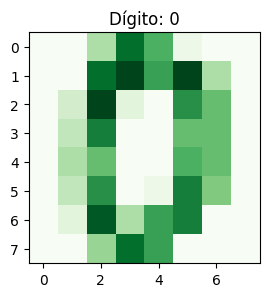

In [14]:
# visualizo el ejemplo para confirmar que se ve como un dígito
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.imshow(image, cmap=plt.cm.Greens)
plt.title(f'Dígito: {label}')
plt.show()


In [15]:
digits.data.shape
# confirma que 'data' viene plano (n_muestras, 64)

(1797, 64)

In [17]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# split en train/test; 'data' es plano (64 features = 8x8)
X_train, X_test, y_train, y_test = train_test_split(
    digits.data, digits.target,
    test_size=0.2, random_state=42
)

# one-hot de las etiquetas para usar softmax (10 clases)
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)



In [18]:
# comprobaciones rápidas de la codificación
y_train.shape

(1437, 10)

In [19]:
y_train[2]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
y_test[2]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])

In [21]:
# Chequeo rápido de los datos antes de modelar

print(X_train.shape)
print(X_test.shape)


(1437, 64)
(360, 64)


In [ ]:
#X_train[2]

In [22]:
# rearmo un ejemplo como 8x8 para visualizar cómo luce en matriz
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
print(reshaped_tensor)


tf.Tensor(
[[ 0.  0.  3. 14.  1.  0.  0.  0.]
 [ 0.  0. 12. 12.  0.  0.  0.  0.]
 [ 0.  3. 16.  6.  0.  0.  0.  0.]
 [ 0.  5. 16.  2.  0.  0.  0.  0.]
 [ 0.  6. 16.  2.  5.  2.  0.  0.]
 [ 0.  4. 16.  2. 12. 15.  2.  0.]
 [ 0.  1. 14. 13.  2. 13. 11.  0.]
 [ 0.  0.  3. 11. 16. 13.  4.  0.]], shape=(8, 8), dtype=float64)


In [23]:
# Ejemplo de matriz pero plano
X_train[0]

array([ 0.,  0.,  3., 14.,  1.,  0.,  0.,  0.,  0.,  0., 12., 12.,  0.,
        0.,  0.,  0.,  0.,  3., 16.,  6.,  0.,  0.,  0.,  0.,  0.,  5.,
       16.,  2.,  0.,  0.,  0.,  0.,  0.,  6., 16.,  2.,  5.,  2.,  0.,
        0.,  0.,  4., 16.,  2., 12., 15.,  2.,  0.,  0.,  1., 14., 13.,
        2., 13., 11.,  0.,  0.,  0.,  3., 11., 16., 13.,  4.,  0.])

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# normalizo (estandarizo) cada feature: media 0, var 1. esto suele ayudar a la red
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
# vuelvo a ver el primer ejemplo ya escalado; lo “flooreo” para que no imprima mil decimales
reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
# Redondeamos para tener una mejor visualizacion
reshaped_tensor =  tf.floor(reshaped_tensor * 100) / 100  #floor hay que ponerlo, porque si no quedan valores de 8 dígitos
print(reshaped_tensor)

tf.Tensor(
[[ 0.   -0.35 -0.47  0.5  -2.55 -1.04 -0.41 -0.14]
 [-0.07 -0.62  0.3   0.   -2.19 -1.36 -0.53 -0.14]
 [-0.05  0.12  1.08 -0.2  -1.17 -1.28 -0.56 -0.12]
 [-0.04  0.86  1.13 -1.17 -1.61 -1.29 -0.63 -0.05]
 [ 0.    1.09  1.34 -1.13 -0.91 -1.14 -0.82  0.  ]
 [-0.07  0.82  1.39 -0.83  0.69  1.17 -0.34 -0.1 ]
 [-0.04  0.15  1.14  0.64 -1.43  0.68  1.47 -0.22]
 [-0.03 -0.31 -0.5  -0.25  0.84  1.05  0.45 -0.2 ]], shape=(8, 8), dtype=float64)


In [26]:
# reacomodo a (n, 8, 8). nota: la CNN espera (n, 8, 8, 1); aquí el canal 1 lo asume la primera capa.
# si alguna vez marca error de forma, agregar explícitamente el canal con expand_dims.
# Redimensionar el tensor a la forma (total, 8, 8)
X_train = tf.reshape(X_train, (X_train.shape[0], 8, 8))
X_test = tf.reshape(X_test, (X_test.shape[0], 8, 8))

In [27]:
#reshaped_tensor = tf.reshape(X_train[0], shape=(8, 8))
#print(reshaped_tensor) #este es el ejemplo sin floor

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

# modelo CNN básico para imágenes 8x8:
# conv (detecta patrones) → pool (resume) -> flatten -> densas -> softmax(10)
# Crear el modelo de CNN
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),
        activation='relu',
        input_shape=(8, 8, 1)
    ),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [31]:
# el warning de Keras sugiere usar Input() como primera capa; no afecta el entrenamiento real
from tensorflow.keras.optimizers import Adam

# Tasa de aprendizaje deseada
learning_rate = 0.001
adam_optimizer = Adam(learning_rate=learning_rate)

In [32]:
# compilo el modelo (adam + crossentropy multiclase + accuracy)
# si quisiera usar el lr definido, sería optimizer=adam_optimizer (pero no cambio nada)
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [33]:
# entreno 20 épocas con batch 32 y validación del 20% del train
history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 10s 97ms/step - accuracy: 0.4662 - loss: 1.8754 - val_accuracy: 0.8507 - val_loss: 0.7808
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9280 - loss: 0.5340 - val_accuracy: 0.9062 - val_loss: 0.3834
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9543 - loss: 0.2295 - val_accuracy: 0.9306 - val_loss: 0.2738
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9747 - loss: 0.1395 - val_accuracy: 0.9410 - val_loss: 0.2293
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9799 - loss: 0.1012 - val_accuracy: 0.9375 - val_loss: 0.1800
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9752 - loss: 0.0863 - val_accuracy: 0.9514 - val_loss: 0.1588
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9897 - loss: 0.0584 - val_accuracy: 0.9549 - val_loss: 0.1576
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9926 - loss: 0.0519 - val_accuracy: 0.9583 - val_los

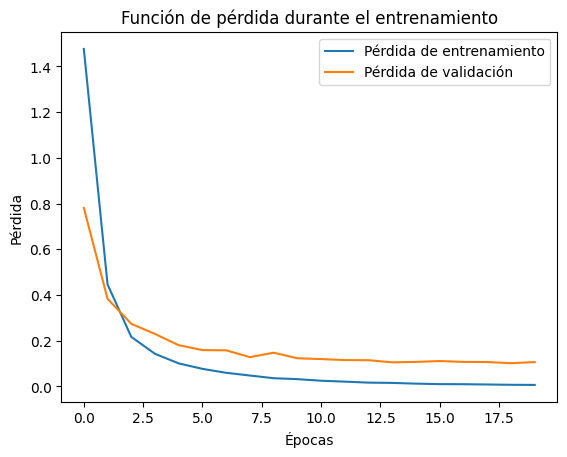

In [34]:
# los logs me sirven para ver que val_loss baje y val_accuracy suba (sin separarse mucho de train)
import matplotlib.pyplot as plt

# curva de pérdida para detectar overfitting/underfitting a ojo
plt.plot(history.history['loss'], label='Pérdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de validación')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Función de pérdida durante el entrenamiento')
plt.show()


In [36]:
# evaluación final en test (datos nunca vistos por el modelo)
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}')

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9874 - loss: 0.0435
Loss: 0.055465035140514374, Accuracy: 0.980555534362793


In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix, recall_score

y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
# Convert y_test back to multiclass format
y_test_classes = np.argmax(y_test, axis=1)

# matriz de confusión y recall por clase para ver dónde falla más
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
sensitivity = recall_score(y_test_classes, y_pred_classes, average=None)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step


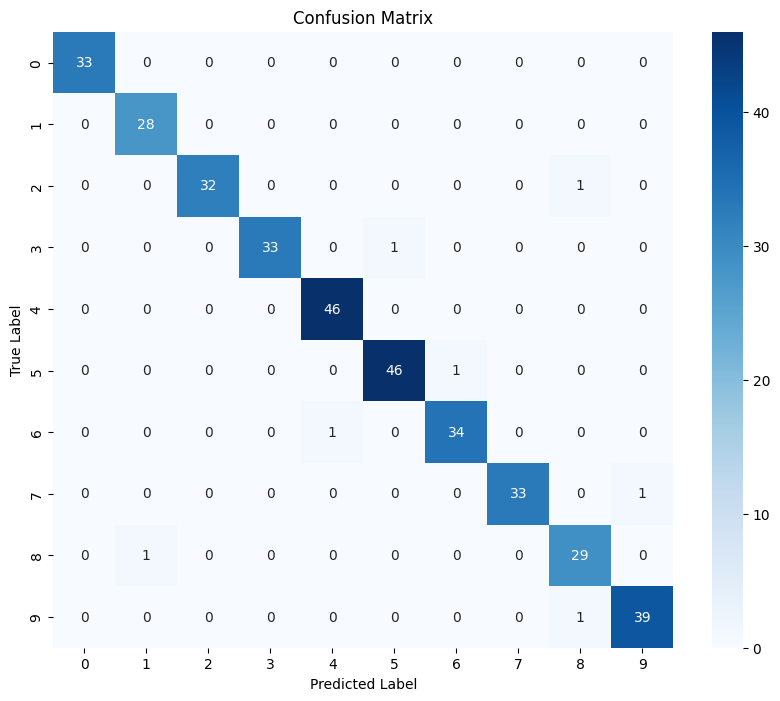

Sensitivity (Recall) for each class:
Class 0: 1.0
Class 1: 1.0
Class 2: 0.9696969696969697
Class 3: 0.9705882352941176
Class 4: 1.0
Class 5: 0.9787234042553191
Class 6: 0.9714285714285714
Class 7: 0.9705882352941176
Class 8: 0.9666666666666667
Class 9: 0.975


In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar la matriz de confusión como una imagen de colores
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Mostrar la sensibilidad (recall) para cada clase
print('Sensitivity (Recall) for each class:')
for i in range(10):
    print(f'Class {i}: {sensitivity[i]}')

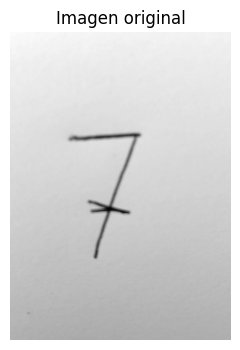

In [40]:
from PIL import Image
import matplotlib.pyplot as plt

# Cambia por el nombre de tu archivo
ruta = "/content/mi_numero.jpg"
# Escala de grises ("L")
img = Image.open(ruta).convert("L")

# mostrar la imagen
plt.figure(figsize=(4, 4))
plt.imshow(img, cmap="gray")
plt.title("Imagen original")
plt.axis("off")
plt.show()


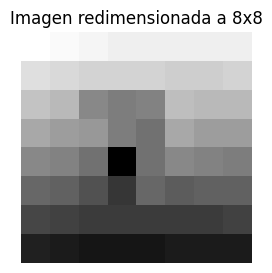

In [41]:
import matplotlib.pyplot as plt

# redimensionar a 8x8 para que coincida con el dataset
img_resized = img.resize((8, 8), Image.Resampling.LANCZOS)

# mostrar imagen
plt.figure(figsize=(3, 3))
plt.imshow(img_resized, cmap="gray")
plt.title("Imagen redimensionada a 8x8")
plt.axis("off")
plt.show()

# opcional, guardamos la imagen si es necesario
img_resized.save("imagen_8x8.png")


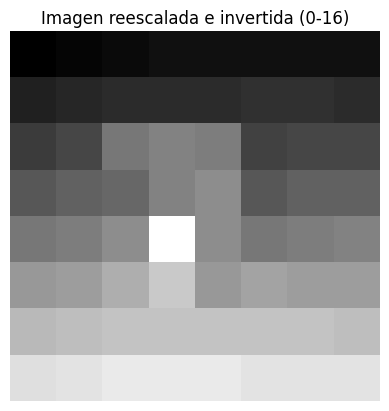

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# reescalar de 0-255 a 0-16 e invertir (fondo negro = 0) para parecerse a digits
# ojo con el contraste: si el fondo no coincide, esto ayuda
# reescalar de 0-255 a 0-16 e invertir (fondo negro = 0)
img_array = np.array(img_resized).astype("float32")
img_array = 16 - (img_array / 255 * 16)

# mostrar imagen
plt.imshow(img_array, cmap="gray")
plt.title("Imagen reescalada e invertida (0-16)")
plt.axis("off")
plt.show()


In [43]:
from sklearn.preprocessing import StandardScaler

# normalizar imagen externa
# nota: aquí ajusto un scaler NUEVO a la imagen (no el del entrenamiento). sirve para demo,
# pero si quiero máxima coherencia, debería reutilizar el 'scaler' ya entrenado.
scaler = StandardScaler()
img_flat = img_array
img_scaled = scaler.fit_transform(img_flat)

# Dar forma (1,8,8) que es el input del modelo
img_tensor = img_scaled.reshape(1, 8, 8)

In [44]:
# predicción final del dígito en la imagen externa
pred = model.predict(img_tensor)
digit = np.argmax(pred)
print("Predicción:", digit)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
Predicción: 6
